In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.formats.format import get_precision
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA


# General

For analysing the data in the Elite Dataset, we extracted 1 millions games from the PGN files and created a CSV file with the features of the games.

In [94]:
# Load the data
df = pd.read_csv('CSV_Output/elite_chess_games_features-1M_Games.csv')
df

,id,turns,white_id,black_id,white_rating,black_rating,time_control,opening_eco,opening_name,victory_status,winner
0,fXkApJtY,105,globito,alphafischer2019,2542,2357,180+2,B36,"Sicilian Defense: Accelerated Dragon, MarÃ³czy...",normal,1
1,8SwZugve,111,Lefjonjuv,lamomia,2454,2329,180+2,A13,English Opening: Neo-Catalan Declined,normal,1
2,a1s9Vkkx,109,Estudio_de_aperturas,TokChess,2352,2469,180+2,B41,"Sicilian Defense: Kan Variation, MarÃ³czy Bind...",time forfeit,1
3,eLxf8axC,37,PJatoba,rasool78,2464,2283,180+2,A04,Zukertort Opening: Queenside Fianchetto Variation,time forfeit,1
4,A7khKLxN,110,theken,Eltitiritero7,2494,2564,180+0,B10,Caro-Kann Defense,time forfeit,-1
...,...,...,...,...,...,...,...,...,...,...,...
999995,JWx0kk6T,118,Kapik1337,shahruh94,2450,2389,180+0,B01,Scandinavian Defense,time forfeit,-1
999996,gee8JlqC,77,kourosh311,Belsychess,2407,2536,180+0,A88,"Dutch Defense: Leningrad Variation, Warsaw Var...",time forfeit,1
999997,U5BkAucX,59,Bierpower,armin_khajavi,2367,2429,180+0,B13,Caro-Kann Defense: Exchange Variation,normal,1
999998,2RHzoBoY,33,Schach-Zauber,Aleksandr77777,2658,2269,300+0,D34,Tarrasch Defense: Classical Variation,normal,1


In [95]:
print("(rows, columns) : ")
print(df.shape)

(rows, columns) : 
(1000000, 11)


As we can see the dataset is do not contain null values in any of the columns.

In [96]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1000000 non-null  object
 1   turns           1000000 non-null  int64 
 2   white_id        1000000 non-null  object
 3   black_id        1000000 non-null  object
 4   white_rating    1000000 non-null  int64 
 5   black_rating    1000000 non-null  int64 
 6   time_control    1000000 non-null  object
 7   opening_eco     1000000 non-null  object
 8   opening_name    1000000 non-null  object
 9   victory_status  1000000 non-null  object
 10  winner          1000000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 83.9+ MB
None


# Data analysis

## Feature analysis

Feature list :

In [97]:
features = df.columns
if 'index' in features:
    features.remove('index')
print("Features list :")
for f in features:
    print(" - ", f)

Features list :
 -  id
 -  turns
 -  white_id
 -  black_id
 -  white_rating
 -  black_rating
 -  time_control
 -  opening_eco
 -  opening_name
 -  victory_status
 -  winner


As we can see, the dataset was well extracted as we do not have any id duplicates.

In [98]:
# Check if id is unique
print("Number of unique games : ", df['id'].nunique())

Number of unique games :  1000000


In [99]:
# function to get the correlation between two numerical features
def get_correlation(df, feature1, feature2):
    return df[feature1].corr(df[feature2])

def plot_distribution(df, feature,kde = False):
    plt.figure(figsize=(10, 6))
    if kde :
        sns.kdeplot(df[feature],fill=True)
    else :
        sns.countplot(data=df, x=feature, hue=feature, palette='coolwarm')
    plt.title(f"Distribution of {feature} vs Unrated Games")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f"{feature} distribution")
    plt.show()

def plot_boxplot(df, feature1, feature2):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature1, y=feature2, hue=feature2, palette='pastel')
    plt.title(f"{feature1} vs {feature2}")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()


- In this data set, we do not have any unrated games which is good for the analysis do not have to deal with the bias of the unrated games.
- When extracting the data, the author did not include the duration of the games. We will not be able to analyse the duration of the games.

### Turns
- Data type : int
- Number of turns in the game

In [100]:
feature = features[1]
df[feature].describe()

count    1000000.000000
mean          82.882291
std           35.347900
min            0.000000
25%           57.000000
50%           78.000000
75%          105.000000
max          574.000000
Name: turns, dtype: float64

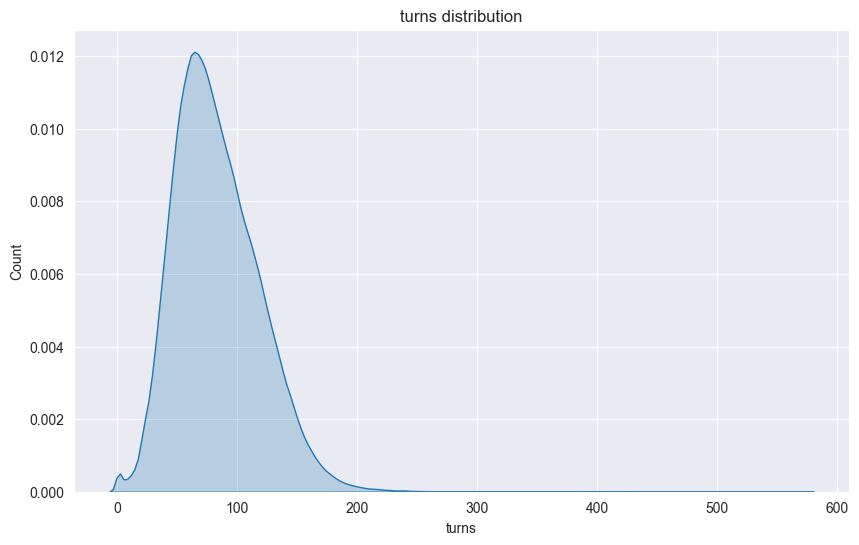

In [101]:
plot_distribution(df, feature, kde=True)

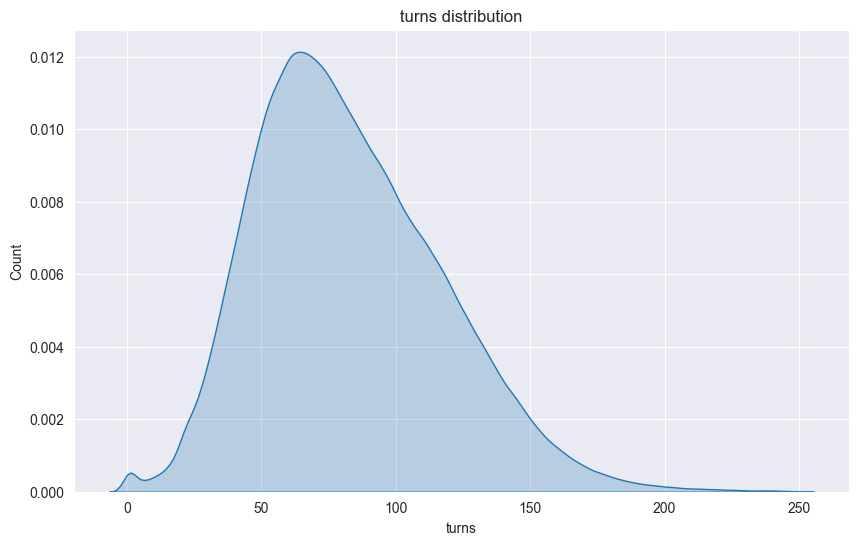

In [102]:
# plot ditribution of the game duration for duration < 250 minutes to have a better view
def remove_outliers(df, feature, threshold):
    return df[df[feature] < threshold]
plot_distribution(remove_outliers(df, feature, 250), feature, kde=True)

We can see that the correlation with the winner is very close to 0. We can say that the number of turns does not have a big impact on the winner.

In [103]:
get_correlation(df, feature, 'winner')

np.float64(-0.03458178024240786)

### Rating
- Data type : int
- Rating of the player
The data set contains only games of player with a very high rating. The rating of the players is between 2200 and 3200.

In [104]:
feature = 'white_rating'
df[feature].describe()

count    1000000.000000
mean        2445.262972
std          102.124707
min         2200.000000
25%         2392.000000
50%         2437.000000
75%         2501.000000
max         3293.000000
Name: white_rating, dtype: float64

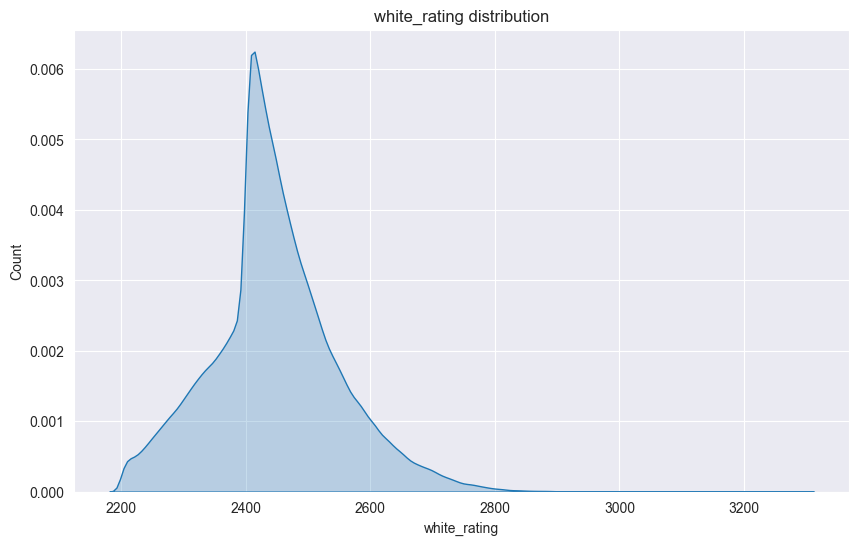

In [105]:
plot_distribution(df, feature, kde=True)

In [106]:
feature = 'black_rating'
df[feature].describe()

count    1000000.000000
mean        2445.283739
std          102.100209
min         2200.000000
25%         2392.000000
50%         2437.000000
75%         2501.000000
max         3305.000000
Name: black_rating, dtype: float64

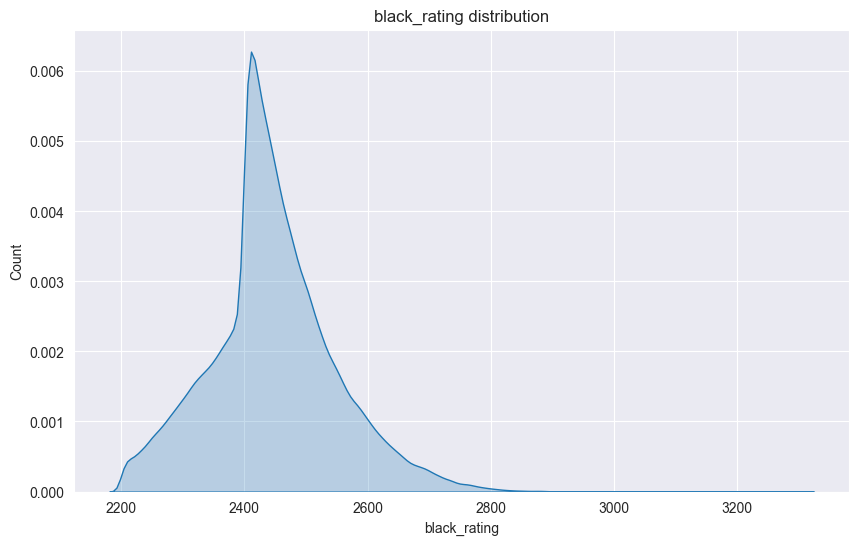

In [107]:
plot_distribution(df, feature, kde=True)

Let us add the difference between the ratings of the players to the dataset. This feature can be useful for the analysis. A positive value means that the white player has a higher rating than the black player.

In [108]:
df['rating_diff'] = df['white_rating'] - df['black_rating']
df['rating_diff'].describe()

count    1000000.000000
mean          -0.020767
std          126.479904
min         -880.000000
25%          -86.000000
50%            0.000000
75%           86.000000
max          882.000000
Name: rating_diff, dtype: float64

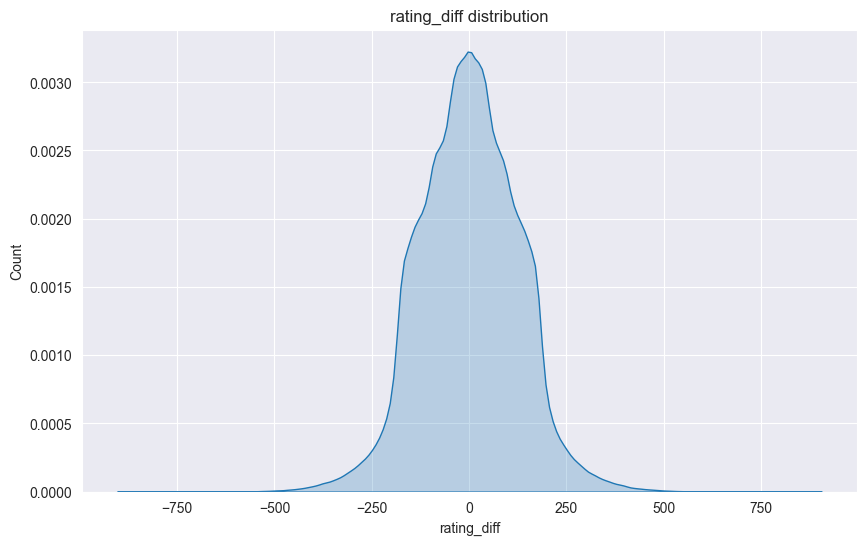

In [109]:
plot_distribution(df, 'rating_diff', kde=True)

In [110]:
get_correlation(df, 'rating_diff', 'winner')

np.float64(0.30348897307774375)

We can see that the correlation between the rating difference and the winner is not very high. We can try with removing the draws to see if the correlation is higher.

In [111]:
df_without_draws = df[df['winner'] != 0]
print(df_without_draws.shape)
print("Correlation : " ,get_correlation(df_without_draws, 'rating_diff', 'winner'))


(900465, 12)
Correlation :  0.3176807494571062


### Time control
- Data type : string
- Time control of the game
See the other data analysis or the blog readme to see what the time control means.
> Note that in this dataset, the first value of the time control is in seconds.

In [112]:
feature = 'time_control'
df[feature].describe()

count     1000000
unique        185
top         180+0
freq       730863
Name: time_control, dtype: object

In [113]:
df[feature].value_counts()

time_control
180+0      730863
180+2      156444
300+0       62917
600+0       23854
180+1        8251
            ...  
60+9            1
300+11          1
60+180          1
1200+60         1
2700+15         1
Name: count, Length: 185, dtype: int64

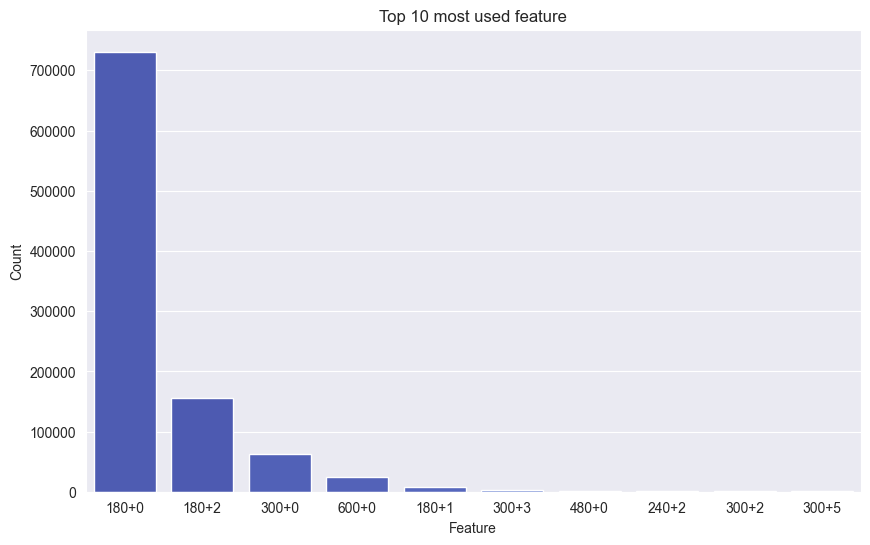

In [114]:
# plot the top 10 most used increment codes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=feature, hue=feature, order=df[feature].value_counts().iloc[:10].index, palette='coolwarm')
plt.title("Top 10 most used feature")
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

In [115]:
# Let's extract the two
df[feature] = df[feature].astype(str)
df['time_per_player'] = df[feature].apply(lambda x: int(x.split('+')[0])/60)
df['increment'] = df[feature].apply(lambda x: int(x.split('+')[1]))
df

,id,turns,white_id,black_id,white_rating,black_rating,time_control,opening_eco,opening_name,victory_status,winner,rating_diff,time_per_player,increment
0,fXkApJtY,105,globito,alphafischer2019,2542,2357,180+2,B36,"Sicilian Defense: Accelerated Dragon, MarÃ³czy...",normal,1,185,3.0,2
1,8SwZugve,111,Lefjonjuv,lamomia,2454,2329,180+2,A13,English Opening: Neo-Catalan Declined,normal,1,125,3.0,2
2,a1s9Vkkx,109,Estudio_de_aperturas,TokChess,2352,2469,180+2,B41,"Sicilian Defense: Kan Variation, MarÃ³czy Bind...",time forfeit,1,-117,3.0,2
3,eLxf8axC,37,PJatoba,rasool78,2464,2283,180+2,A04,Zukertort Opening: Queenside Fianchetto Variation,time forfeit,1,181,3.0,2
4,A7khKLxN,110,theken,Eltitiritero7,2494,2564,180+0,B10,Caro-Kann Defense,time forfeit,-1,-70,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,JWx0kk6T,118,Kapik1337,shahruh94,2450,2389,180+0,B01,Scandinavian Defense,time forfeit,-1,61,3.0,0
999996,gee8JlqC,77,kourosh311,Belsychess,2407,2536,180+0,A88,"Dutch Defense: Leningrad Variation, Warsaw Var...",time forfeit,1,-129,3.0,0
999997,U5BkAucX,59,Bierpower,armin_khajavi,2367,2429,180+0,B13,Caro-Kann Defense: Exchange Variation,normal,1,-62,3.0,0
999998,2RHzoBoY,33,Schach-Zauber,Aleksandr77777,2658,2269,300+0,D34,Tarrasch Defense: Classical Variation,normal,1,389,5.0,0


In [116]:
feature = 'time_per_player'
df[feature].describe()

count    1000000.000000
mean           3.364824
std            1.614383
min            0.000000
25%            3.000000
50%            3.000000
75%            3.000000
max          180.000000
Name: time_per_player, dtype: float64

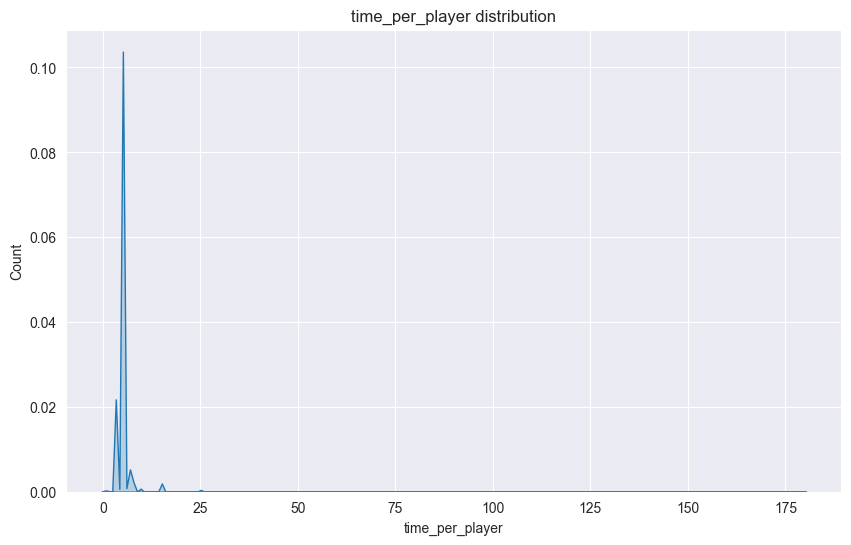

In [117]:
plot_distribution(df, feature, kde=True)

### Openings
- Data type : string
- Opening ECO code
The dat

In [118]:
feature = 'opening_eco'
df[feature].describe()

count     1000000
unique        500
top           A45
freq        29514
Name: opening_eco, dtype: object

In [119]:
df[feature].value_counts()

opening_eco
A45    29514
A04    26684
A00    26194
A40    25959
B06    22468
       ...  
D69       11
E03        8
E78        7
D54        6
D65        1
Name: count, Length: 500, dtype: int64

It is a good idea to transform the ECO code to numerical values. We can use the **LabelEncoder** or the **OneHotEncoder** from sklearn. As the ECO codes are not ordinal, we will use the **OneHotEncoder** combine with PCA to reduce the dimensionality.

In [120]:
encoder = OneHotEncoder(sparse_output=True)
eco_encoded = encoder.fit_transform(df[[feature]])
eco_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1000000 stored elements and shape (1000000, 500)>

In [121]:
pca = PCA(n_components=10)

pca_result = pca.fit_transform(eco_encoded)

pca_df = pd.DataFrame(data = pca_result, columns = [f'pca_openings_{i}' for i in range(10)])
pca_df

,pca_openings_0,pca_openings_1,pca_openings_2,pca_openings_3,pca_openings_4,pca_openings_5,pca_openings_6,pca_openings_7,pca_openings_8,pca_openings_9
0,-0.013758,-0.005421,-0.003299,-0.028052,-0.015777,-0.022443,-0.009211,-0.001077,-0.003715,-0.006977
1,-0.017514,-0.007099,-0.004344,-0.037538,-0.022105,-0.032416,-0.014840,-0.001834,-0.006358,-0.012078
2,-0.014121,-0.005579,-0.003397,-0.028927,-0.016337,-0.023302,-0.009650,-0.001133,-0.003910,-0.007349
3,-0.158337,0.873672,0.135478,0.369886,0.072152,0.072434,0.014983,0.001423,0.004826,0.008744
4,-0.025079,-0.010787,-0.006683,-0.059921,-0.039688,-0.063675,-0.045668,-0.008189,-0.029695,-0.062776
...,...,...,...,...,...,...,...,...,...,...
999995,-0.048187,-0.025492,-0.016621,-0.177340,-0.339867,0.900627,0.034952,0.002875,0.009655,0.017148
999996,-0.013510,-0.005314,-0.003232,-0.027458,-0.015400,-0.021868,-0.008922,-0.001040,-0.003587,-0.006734
999997,-0.017938,-0.007295,-0.004466,-0.038669,-0.022900,-0.033713,-0.015669,-0.001953,-0.006775,-0.012894
999998,-0.013907,-0.005486,-0.003339,-0.028411,-0.016007,-0.022794,-0.009390,-0.001100,-0.003794,-0.007128


In [122]:
df = pd.concat([df, pca_df], axis=1)
df

,id,turns,white_id,black_id,white_rating,black_rating,time_control,opening_eco,opening_name,victory_status,...,pca_openings_0,pca_openings_1,pca_openings_2,pca_openings_3,pca_openings_4,pca_openings_5,pca_openings_6,pca_openings_7,pca_openings_8,pca_openings_9
0,fXkApJtY,105,globito,alphafischer2019,2542,2357,180+2,B36,"Sicilian Defense: Accelerated Dragon, MarÃ³czy...",normal,...,-0.013758,-0.005421,-0.003299,-0.028052,-0.015777,-0.022443,-0.009211,-0.001077,-0.003715,-0.006977
1,8SwZugve,111,Lefjonjuv,lamomia,2454,2329,180+2,A13,English Opening: Neo-Catalan Declined,normal,...,-0.017514,-0.007099,-0.004344,-0.037538,-0.022105,-0.032416,-0.014840,-0.001834,-0.006358,-0.012078
2,a1s9Vkkx,109,Estudio_de_aperturas,TokChess,2352,2469,180+2,B41,"Sicilian Defense: Kan Variation, MarÃ³czy Bind...",time forfeit,...,-0.014121,-0.005579,-0.003397,-0.028927,-0.016337,-0.023302,-0.009650,-0.001133,-0.003910,-0.007349
3,eLxf8axC,37,PJatoba,rasool78,2464,2283,180+2,A04,Zukertort Opening: Queenside Fianchetto Variation,time forfeit,...,-0.158337,0.873672,0.135478,0.369886,0.072152,0.072434,0.014983,0.001423,0.004826,0.008744
4,A7khKLxN,110,theken,Eltitiritero7,2494,2564,180+0,B10,Caro-Kann Defense,time forfeit,...,-0.025079,-0.010787,-0.006683,-0.059921,-0.039688,-0.063675,-0.045668,-0.008189,-0.029695,-0.062776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,JWx0kk6T,118,Kapik1337,shahruh94,2450,2389,180+0,B01,Scandinavian Defense,time forfeit,...,-0.048187,-0.025492,-0.016621,-0.177340,-0.339867,0.900627,0.034952,0.002875,0.009655,0.017148
999996,gee8JlqC,77,kourosh311,Belsychess,2407,2536,180+0,A88,"Dutch Defense: Leningrad Variation, Warsaw Var...",time forfeit,...,-0.013510,-0.005314,-0.003232,-0.027458,-0.015400,-0.021868,-0.008922,-0.001040,-0.003587,-0.006734
999997,U5BkAucX,59,Bierpower,armin_khajavi,2367,2429,180+0,B13,Caro-Kann Defense: Exchange Variation,normal,...,-0.017938,-0.007295,-0.004466,-0.038669,-0.022900,-0.033713,-0.015669,-0.001953,-0.006775,-0.012894
999998,2RHzoBoY,33,Schach-Zauber,Aleksandr77777,2658,2269,300+0,D34,Tarrasch Defense: Classical Variation,normal,...,-0.013907,-0.005486,-0.003339,-0.028411,-0.016007,-0.022794,-0.009390,-0.001100,-0.003794,-0.007128


### Victory status
- Data type : string
- Victory status of the game (normal - checkmate -, time_forfeit, abandoned, rules infraction)

In [123]:
feature = 'victory_status'
df[feature].describe()

count     1000000
unique          4
top        normal
freq       786709
Name: victory_status, dtype: object

In [124]:
df[feature].value_counts()

victory_status
normal              786709
time forfeit        211999
abandoned             1269
rules infraction        23
Name: count, dtype: int64

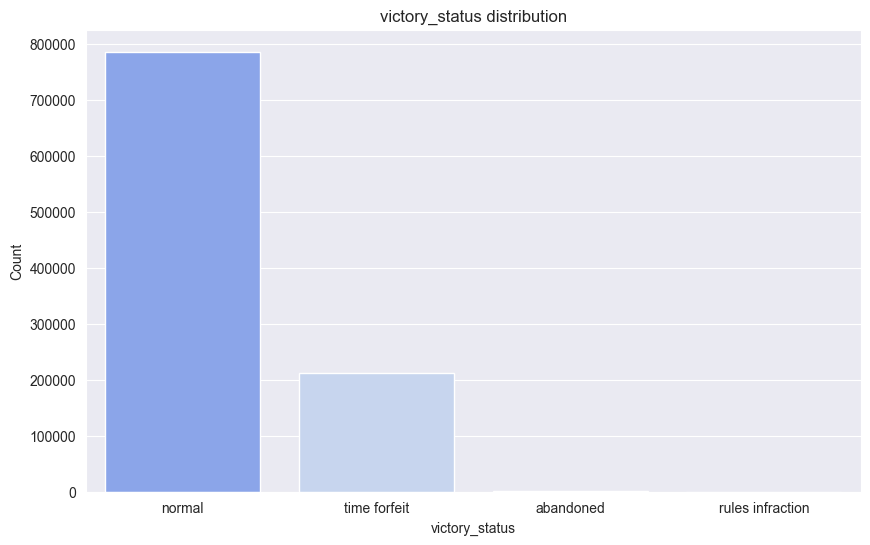

In [125]:
plot_distribution(df, feature)

As for openings, we can transform the victory status to numerical values. We will use the **OneHotEncoder** alone as the values are not ordinal and there are only 4 values.

In [126]:
encoder = OneHotEncoder(sparse_output=True)
victory_encoded = encoder.fit_transform(df[[feature]])
victory_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1000000 stored elements and shape (1000000, 4)>

In [127]:
# Get the original category names
category_names = encoder.categories_[0]

# Create the DataFrame with the original category names as column names
victory_df = pd.DataFrame(data=victory_encoded.toarray(), columns=category_names)
victory_df

,abandoned,normal,rules infraction,time forfeit
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
999995,0.0,0.0,0.0,1.0
999996,0.0,0.0,0.0,1.0
999997,0.0,1.0,0.0,0.0
999998,0.0,1.0,0.0,0.0


In [128]:
df = pd.concat([df, victory_df], axis=1)
df

,id,turns,white_id,black_id,white_rating,black_rating,time_control,opening_eco,opening_name,victory_status,...,pca_openings_4,pca_openings_5,pca_openings_6,pca_openings_7,pca_openings_8,pca_openings_9,abandoned,normal,rules infraction,time forfeit
0,fXkApJtY,105,globito,alphafischer2019,2542,2357,180+2,B36,"Sicilian Defense: Accelerated Dragon, MarÃ³czy...",normal,...,-0.015777,-0.022443,-0.009211,-0.001077,-0.003715,-0.006977,0.0,1.0,0.0,0.0
1,8SwZugve,111,Lefjonjuv,lamomia,2454,2329,180+2,A13,English Opening: Neo-Catalan Declined,normal,...,-0.022105,-0.032416,-0.014840,-0.001834,-0.006358,-0.012078,0.0,1.0,0.0,0.0
2,a1s9Vkkx,109,Estudio_de_aperturas,TokChess,2352,2469,180+2,B41,"Sicilian Defense: Kan Variation, MarÃ³czy Bind...",time forfeit,...,-0.016337,-0.023302,-0.009650,-0.001133,-0.003910,-0.007349,0.0,0.0,0.0,1.0
3,eLxf8axC,37,PJatoba,rasool78,2464,2283,180+2,A04,Zukertort Opening: Queenside Fianchetto Variation,time forfeit,...,0.072152,0.072434,0.014983,0.001423,0.004826,0.008744,0.0,0.0,0.0,1.0
4,A7khKLxN,110,theken,Eltitiritero7,2494,2564,180+0,B10,Caro-Kann Defense,time forfeit,...,-0.039688,-0.063675,-0.045668,-0.008189,-0.029695,-0.062776,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,JWx0kk6T,118,Kapik1337,shahruh94,2450,2389,180+0,B01,Scandinavian Defense,time forfeit,...,-0.339867,0.900627,0.034952,0.002875,0.009655,0.017148,0.0,0.0,0.0,1.0
999996,gee8JlqC,77,kourosh311,Belsychess,2407,2536,180+0,A88,"Dutch Defense: Leningrad Variation, Warsaw Var...",time forfeit,...,-0.015400,-0.021868,-0.008922,-0.001040,-0.003587,-0.006734,0.0,0.0,0.0,1.0
999997,U5BkAucX,59,Bierpower,armin_khajavi,2367,2429,180+0,B13,Caro-Kann Defense: Exchange Variation,normal,...,-0.022900,-0.033713,-0.015669,-0.001953,-0.006775,-0.012894,0.0,1.0,0.0,0.0
999998,2RHzoBoY,33,Schach-Zauber,Aleksandr77777,2658,2269,300+0,D34,Tarrasch Defense: Classical Variation,normal,...,-0.016007,-0.022794,-0.009390,-0.001100,-0.003794,-0.007128,0.0,1.0,0.0,0.0


## Winner

- Data type : int
- Winner of the game (0: draw, 1: white, -1: black)

In [129]:
feature = 'winner'
df[feature].describe()

count    1000000.000000
mean           0.045693
std            0.947828
min           -1.000000
25%           -1.000000
50%            0.000000
75%            1.000000
max            1.000000
Name: winner, dtype: float64

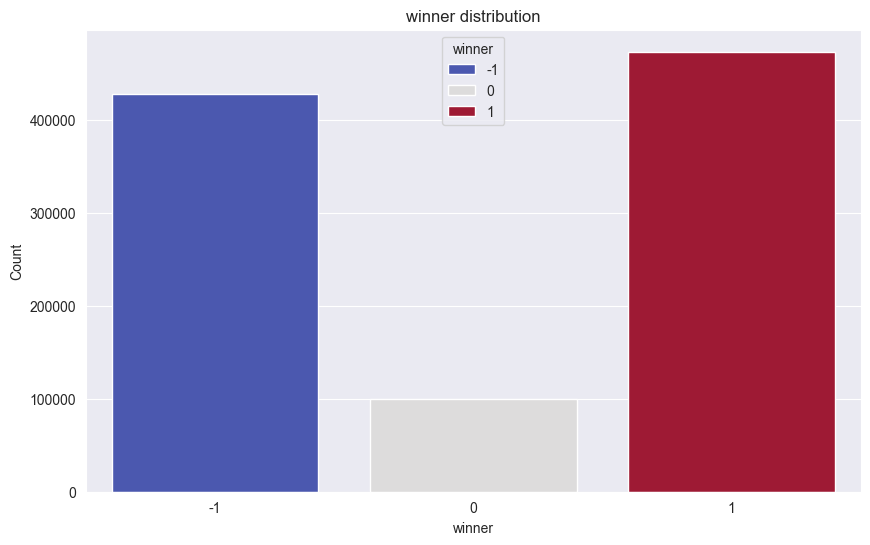

In [130]:
plot_distribution(df, feature)

## Correlation between features

Let's see the correlation between the features and the winner.

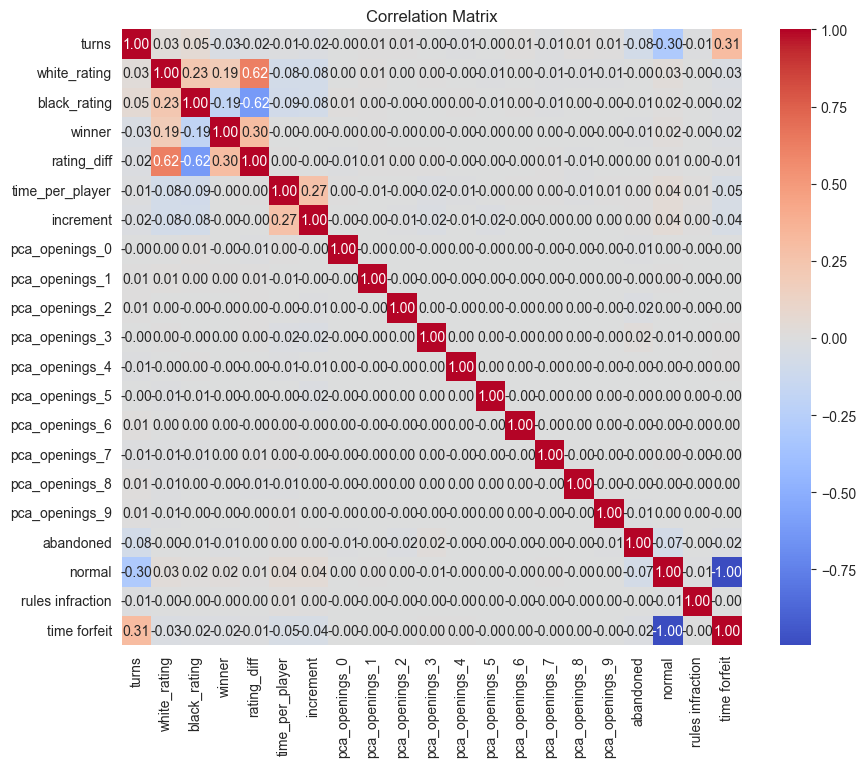

In [131]:
# Function to plot the correlation matrix
def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(df)

In [133]:
# save the data to a new csv file
df.to_csv('CSV_Output/elite_chess_games_features-1M_Games_cleaned.csv', index=False)